# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [3]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [4]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE


class RBNode:
    def __init__(self, value, parent, color=False):
        self.value = value
        self.left = None
        self.right = None
        self.color = color
        self.parent = parent

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

Use the cell below to implement the requested API by means of **sequential search**.

In [5]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.data = []

    def insertElement(self, element):
        # ADD YOUR CODE HERE
        if not self.searchElement(element):
            self.data.append(element)
            return True
        return False

    def searchElement(self, element):
        # ADD YOUR CODE HERE
        for item in self.data:
            if item == element:
                return True
        return False

Use the cell below to implement the requested API by means of **binary search tree**.

In [6]:
class BinarySearchTreeSet(AbstractSet):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.root = None

    def insertElement(self, element):
        # ADD YOUR CODE HERE
        if self.root is None:
            self.root = Node(element)
            return True
        current = self.root
        while current:
            if current.value == element:
                return False
            elif current.value > element:
                if current.left is None:
                    current.left = Node(element)
                    return True
                current = current.left
            else:
                if current.right is None:
                    current.right = Node(element)
                    return True
                current = current.right

    def searchElement(self, element):
        # ADD YOUR CODE HERE
        current = self.root
        while current:
            if current.value == element:
                return True
            elif current.value > element:
                current = current.left
            else:
                current = current.right
        return False

Use the cell below to implement the requested API by means of **balanced search tree**.

In [7]:
class BalancedSearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None

    def searchElement(self, element):
        found = False
        current = self.root
        while current:
            if current.value == element:
                found = True
                break
            elif current.value > element:
                current = current.left
            else:
                current = current.right
        return found

    def insertElement(self, value):
        new_node = RBNode(value, None, True)
        if self.root is None:
            self.root = new_node
        else:
            parent = None
            node = self.root
            while node is not None:
                parent = node
                if new_node.value < node.value:
                    node = node.left
                elif new_node.value > node.value:
                    node = node.right
                else:
                    return False

            new_node.parent = parent
            if new_node.value < parent.value:
                parent.left = new_node
            else:
                parent.right = new_node

        self.balanceTree(new_node)
        return True

    def balanceTree(self, node):
        while node.parent is not None and node.parent.color:
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle is not None and uncle.color:
                    # flipColors
                    node.parent.color = False
                    uncle.color = False
                    node.parent.parent.color = True
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.rotateLeft(node)

                    node.parent.color = False
                    node.parent.parent.color = True
                    self.rotateRight(node.parent.parent)
            else:
                uncle = node.parent.parent.left
                if uncle is not None and uncle.color:
                    # flipColors
                    node.parent.color = False
                    uncle.color = False
                    node.parent.parent.color = True
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.rotateRight(node)

                    node.parent.color = False
                    node.parent.parent.color = True
                    self.rotateLeft(node.parent.parent)

        self.root.color = False

    def rotateLeft(self, node):
        right_child = node.right
        node.right = right_child.left
        if right_child.left is not None:
            right_child.left.parent = node

        right_child.parent = node.parent
        if node.parent is None:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child

        right_child.left = node
        node.parent = right_child

    def rotateRight(self, node):
        left_child = node.left
        node.left = left_child.right
        if left_child.right is not None:
            left_child.right.parent = node

        left_child.parent = node.parent
        if node.parent is None:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child

        left_child.right = node
        node.parent = left_child

#testing
rb = BalancedSearchTreeSet()
print(rb.insertElement(1))
print(rb.insertElement(2))
rb.insertElement(3)
rb.insertElement(4)
rb.insertElement(5)
rb.insertElement(6)
rb.insertElement(7)
rb.insertElement(9)
print(rb.insertElement(5))
print(rb.root.value)
print(rb.root.left.value)
print(rb.root.right.value)
print(rb.root.right.left.value)
print(rb.root.right.right.value)
print(rb.root.right.right.right.value)
print(rb.root.left.left.value)
print(rb.root.left.right.value)


True
True
False
4
2
6
5
7
9
1
3


Use the cell below to implement the requested API by means of **bloom filter**.

In [8]:
from bitarray import bitarray

class BloomFilterSet(AbstractSet):
    def __init__(self):
        # ADD YOUR CODE HERE
        self.size = 840000
        self.num_hashes = 7
        self.bit_array = bitarray(self.size)
        self.bit_array.setall(0)

    # FNV-1a hash, found at https://en.wikipedia.org/wiki/Fowler%E2%80%93Noll%E2%80%93Vo_hash_function
    def fnv_hash(self, element, seed):
        fnv_offset_basis = 0x811c9dc5
        fnv_prime = 0x01000193
        hash_val = fnv_offset_basis ^ seed
        for char in element:
            hash_val = (hash_val ^ ord(char)) * fnv_prime
        return hash_val % self.size

    def linear_hash(self, element, seed):
        hash_val = 0
        for char in element:
            hash_val = (hash_val * seed + ord(char)) % self.size
        return hash_val

    # builtin hash function
    def builtin_hash(self, element, seed):
        return hash(element + str(seed)) % self.size

    def insertElement(self, element):
        inserted = False
        for seed in range(self.num_hashes):
            hash_val = self.builtin_hash(element, seed)
            if self.bit_array[hash_val] == 0:
                inserted = True
                self.bit_array[hash_val] = 1
        return inserted

    def searchElement(self, element):
        for seed in range(self.num_hashes):
            hash_val = self.builtin_hash(element, seed)
            if self.bit_array[hash_val] == 0:
                return False
        return True



Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [9]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        self.data = []
        self.word_length = 7

    def generateData(self, size):     
        self.data = []
        for i in range(size):
            self.data.append("".join(random.choices(string.ascii_lowercase, k=self.word_length)))
        return self.data

    def TreeWorstCase(self):
        return self.merge_sort(self.data)

    def merge_sort(self, data):
        if len(data) <= 1:
            return data
        mid = len(data) // 2
        left = self.merge_sort(data[:mid])
        right = self.merge_sort(data[mid:])
        return self.merge(left, right)

    def merge(self, left, right):
        result = []
        while len(left) > 0 and len(right) > 0:
            if left[0] < right[0]:
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
        if len(left) > 0:
            result += left
        if len(right) > 0:
            result += right
        return result


Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [10]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON REAL DATA
def read_file(filename):
    my_file = open(filename, 'r')
    data = my_file.read().split()
    my_file.close()
    return data

def print_data(Name, insert_time, search_time):
    print(f"Insert and search times for {Name} are as follows:")
    print(f"Insert time: {insert_time:.6f} seconds")
    print(f"Search time: {search_time:.6f} seconds")
    print()

def test_total_time(searchAlg ,search_set, data_set):
    insert_time = timeit.timeit(lambda: [searchAlg.insertElement(word) for word in data_set], number=1)
    search_time = timeit.timeit(lambda: [searchAlg.searchElement(search_word) for search_word in search_set], number=1)
    return insert_time, search_time

def total_times_real():
    files = ['test1-mobydick.txt', 'test2-warpeace.txt', 'test3-dickens.txt']
    search_set = read_file('testfiles/test-search.txt')
    for file in files:

        seq, bst, llrb, bloom = SequentialSearchSet(), BinarySearchTreeSet(), BalancedSearchTreeSet(), BloomFilterSet()
        print(f"Testing {file[6:-4]}")
        for searchAlg in (seq, bst, llrb, bloom):
            insert_time, search_time = test_total_time(searchAlg, search_set, read_file(f"testfiles/{file}"))
            print_data(searchAlg.__class__.__name__, insert_time, search_time)



In [110]:

# ADD YOUR TEST CODE HERE TO WORK ON SYNTHETIC DATA
def average_times_synthetic(search, data, size):
    #seq = SequentialSearchSet()
    bst = BinarySearchTreeSet()
    rb = BalancedSearchTreeSet()
    bloom = BloomFilterSet()
    if size < 1000000:
        s = (bst, rb, bloom)
    else:
        s = (bst, rb, bloom)
    for searchAlg in s:
        insert_time, search_time = test_total_time(searchAlg, search, data)
        print_data(searchAlg.__class__.__name__, insert_time, search_time)

def worst_times_synthetic(search, data):
    bst = BinarySearchTreeSet()
    insert_time, search_time = test_total_time(bst, search, data)
    print_data(bst.__class__.__name__, insert_time, search_time)

def test_worst_average():
    tdg = TestDataGenerator()
    for size in range(0, 1000000, 10000):
        print(f"For data set of size: {size}")
        data = tdg.generateData(size)
        search = tdg.generateData(size//10)
        worst = tdg.TreeWorstCase()
        if size < 1000000:
            print("Worst case (BST):")
            worst_times_synthetic(search, worst)
        print("Average cases:")
        average_times_synthetic(search, data, size)

test_worst_average()

For data set of size: 10000
Worst case (BST):
Insert and search times for BinarySearchTreeSet are as follows:
Insert time: 0.024015 seconds
Search time: 0.016170 seconds

Average cases:
Insert and search times for BinarySearchTreeSet are as follows:
Insert time: 0.009972 seconds
Search time: 0.000821 seconds

Insert and search times for BalancedSearchTreeSet are as follows:
Insert time: 0.010754 seconds
Search time: 0.000665 seconds

Insert and search times for BloomFilterSet are as follows:
Insert time: 0.014101 seconds
Search time: 0.000314 seconds

For data set of size: 100000
Worst case (BST):
Insert and search times for BinarySearchTreeSet are as follows:
Insert time: 2.032618 seconds
Search time: 1.523503 seconds

Average cases:
Insert and search times for BinarySearchTreeSet are as follows:
Insert time: 0.161139 seconds
Search time: 0.019321 seconds

Insert and search times for BalancedSearchTreeSet are as follows:
Insert time: 0.166651 seconds
Search time: 0.016093 seconds

Ins

Testing the correctness of searches and error of bloom filter

In [22]:
files = ["test1-mobydick.txt", "test2-warpeace.txt", "test3-dickens.txt"]
with open("testfiles/test-search.txt", "r") as t:
    search_data = t.read().split()

def test_bloom_effectiveness():
    for file in files:
        bloom = BloomFilterSet()
        with open(f"testfiles/{file}", "r") as f:
            data = f.read().split()
            for word1 in data:
                bloom.insertElement(word1)
            false = 0
            for search_word in search_data:
                if bloom.searchElement(search_word) and (search_word not in data):
                    false += 1
            print(f"{file}, false positives: {false}, probability: {round((false/len(search_data)* 100), 4)} %")

def test_search_correctness():
    search_set = read_file('testfiles/test-search.txt')
    bst = BinarySearchTreeSet()
    llrb = BalancedSearchTreeSet()
    data = read_file("testfiles/test1-mobydick.txt")
    for word1 in data:
        bst.insertElement(word1)
        llrb.insertElement(word1)
    for search_word in search_set:
        if bst.searchElement(search_word) != (search_word in data):
            print("ERROR: BST not working")
        if llrb.searchElement(search_word) != (search_word in data):
            print("ERROR: LLRB not working")




test_bloom_effectiveness()
#test_search_correctness()


test1-mobydick.txt, false positives: 4, probability: 0.7353 %
test2-warpeace.txt, false positives: 7, probability: 1.2868 %
test3-dickens.txt, false positives: 5, probability: 0.9191 %


Graphing synthetic data using matplotlib

FOR INPUTTING


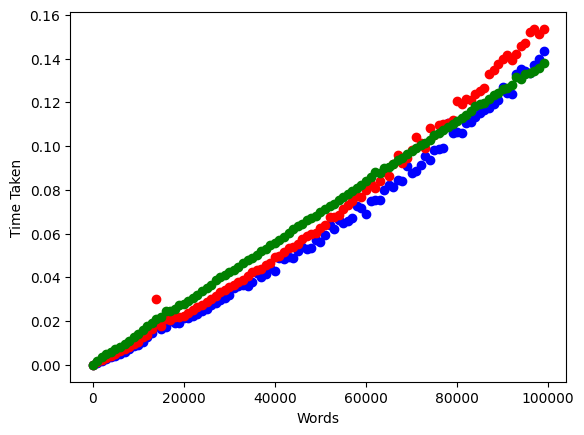

FOR SEARCHING


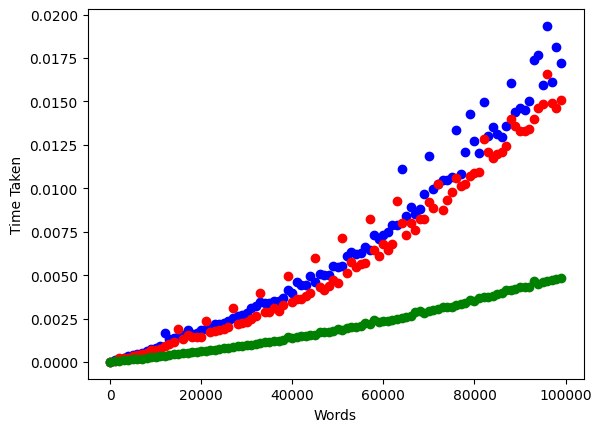

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def display_graphs():

    test = TestDataGenerator()

    inputCounter = []
    seq_timeArray_search = []
    seq_timeArray_insert = []
    bst_timeArray_search = []
    bst_timeArray_insert = []
    rbt_timeArray_search = []
    rbt_timeArray_insert = []
    bf_timeArray_search = []
    bf_timeArray_insert = []

    for input_size in range (1, 100000, 1000):
        #seq = SequentialSearchSet()
        bst = BinarySearchTreeSet()
        rbt = BalancedSearchTreeSet()
        bf = BloomFilterSet()

        inputCounter.append(input_size)
        word_list = test.generateData(input_size)
        search_list = test.generateData(input_size//10)

        #if input_size < 10000:
        #    seq_insert, seq_search =test_total_time(seq, search_list, word_list)
        #    seq_timeArray_insert.append(seq_insert)
        #    seq_timeArray_search.append(seq_search)

        bst_insert, bst_search = test_total_time(bst, search_list, word_list)
        bst_timeArray_insert.append(bst_insert)
        bst_timeArray_search.append(bst_search)

        rbt_insert, rbt_search = test_total_time(rbt, search_list, word_list)
        rbt_timeArray_insert.append(rbt_insert)
        rbt_timeArray_search.append(rbt_search)

        bf_insert, bf_search = test_total_time(bf, search_list, word_list)
        bf_timeArray_insert.append(bf_insert)
        bf_timeArray_search.append(bf_search)

    # median = np.median(timeArray)
    # iqr = np.percentile(timeArray, 75) - np.percentile(timeArray, 25)

    # pop_index_list = []

    # for y in range(len(timeArray) - 1):
    #     if ((timeArray[y] > median + 1.5 * iqr) or (timeArray[y] < median - 1.5 * iqr)):
    #         pop_index_list.append(y)

    # for n in range(len(pop_index_list) - 1):
    #     timeArray.pop(pop_index_list[n])
    #     inputCounter.pop(pop_index_list[n])
    print("FOR INPUTTING")
    plotGraph(inputCounter, seq_timeArray_insert, bst_timeArray_insert, rbt_timeArray_insert, bf_timeArray_insert)
    print("FOR SEARCHING")
    plotGraph(inputCounter, seq_timeArray_search, bst_timeArray_search, rbt_timeArray_search, bf_timeArray_search)

def plotGraph(inputCounter, seq_timeArray, bst_timeArray, rbt_timeArray, bf_timeArray):

    plt.xlabel("Words")
    plt.ylabel("Time Taken")

    #plt.scatter(np.array(inputCounter[:11]), np.array(seq_timeArray), color = 'purple')
    plt.scatter(np.array(inputCounter), np.array(bst_timeArray), color = 'blue')
    plt.scatter(np.array(inputCounter), np.array(rbt_timeArray), color = 'red')
    plt.scatter(np.array(inputCounter), np.array(bf_timeArray), color = 'green')

    plt.show()

display_graphs()

Testing BloomFilter false positives

In [88]:
n_items = 100000
# Create a new Bloom filter
bf = BloomFilterSet()

# Generate n_items random strings of length 10
words = [''.join(random.choices(string.ascii_lowercase, k=10)) for _ in range(n_items)]

# Insert the random strings into the Bloom filter
for word in words:
    bf.insertElement(word)

# Generate a list of n_items/10 random strings of length 10 to search for
search_words = [''.join(random.choices(string.ascii_lowercase, k=10)) for _ in range(n_items//10)]

# Test the accuracy of the Bloom filter
false_positives = 0
for word in search_words:
    if bf.searchElement(word) and word not in words:
        false_positives += 1

print(f"Number of false positives: {false_positives}")

Number of false positives: 240
